# preprocessing for numerical variables (count data) on Youtube dataset
- ref.
    - preprocess methods
        - [機械学習のための特徴量エンジニアリング](https://www.oreilly.co.jp/books/9784873118680/)
        - [5.3. Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#normalization)
    - data: [YouTuberデータセット公開してみた](https://qiita.com/myaun/items/7e0dd7f3f9d9d2fef497)
- TOC
    - <a href="#ready">ready for data</a>
    - for feature value
        - <a href="#pre1">preprocess method 1: binarization (e.g., by mean value)</a>
        - <a href="#pre2">preprocess method 2: discretization 1, ad-hoc division</a>
        - <a href="#pre3">preprocess method 3: discretization 2, quantilzation</a>
        - <a href="#pre4">preprocess method 4: log-scaling</a>
        - <a href="#compare">compare default values with log-scaled values</a>
        - <a href="#standardization">preprocess method 5: standardization</a>
        - <a href="#minmax">preprocess method 6: Min-Max scalering</a>
        - <a href="#normalization">preprocess method 7: normalization (for feature vector)</a>
    - for feature vector
        - <a href="#mapping-gaussian">preprocess method 8: Mapping to a Gaussian distribution (for feature vector)</a>
        - <a href="#compare-box-cox">compare default values with box-cox values</a>

## <a name="ready">ready for data</a>

In [1]:
from quilt.data.haradai1262 import YouTuber
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#df = YouTuber.channels.UUUM()
df = YouTuber.channel_videos.UUUM_videos()

# check the descriptive statistics of numerical data
df.describe()

,viewCount,likeCount,favoriteCount,dislikeCount,commentCount,TopicIds,idx
count,6.627900e+04,64256.000000,66289.0,64256.000000,65997.000000,0.0,66289.000000
mean,4.545539e+05,3233.703390,0.0,296.430014,533.418807,NaN,235.730136
std,1.328105e+06,9768.090605,0.0,1633.734833,2253.437482,NaN,142.868881
min,0.000000e+00,0.000000,0.0,0.000000,0.000000,NaN,1.000000
25%,3.907100e+04,266.000000,0.0,23.000000,55.000000,NaN,111.000000
50%,1.214190e+05,776.000000,0.0,67.000000,150.000000,NaN,229.000000
75%,3.512260e+05,2260.000000,0.0,201.000000,394.000000,NaN,357.000000
max,8.664236e+07,630051.000000,0.0,213677.000000,227598.000000,NaN,501.000000


In [2]:
# the description of data frame
df

,id,title,description,liveBroadcastContent,tags,publishedAt,thumbnails,viewCount,likeCount,favoriteCount,...,commentCount,caption,definition,dimension,duration,projection,TopicIds,relevantTopicIds,idx,cid
0,R7V5d94XkGQ,"【大食い】超高級寿司店で３人で食べ放題したらいくらかかるの!?【大トロ1カン2,000円】",提供：ポコロンダンジョンズ\r\r\r\r\niOS：https://bit.ly/2sGg...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-30T04:00:01.000Z,https://i.ytimg.com/vi/R7V5d94XkGQ/default.jpg,2244205.0,27703.0,0,...,8647.0,False,hd,2d,PT21M16S,rectangular,NaN,"['/m/02wbm', '/m/019_rr', '/m/019_rr', '/m/02w...",1,UCZf__ehlCEBPop___sldpBUQ
1,2R9_bkcWNd4,【女王集結】女性YouTuberたちと飲みながら本音トークしてみたら爆笑www,しばなんチャンネルの動画\r\r\r\r\nhttps://www.youtube.com/...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-29T08:00:01.000Z,https://i.ytimg.com/vi/2R9_bkcWNd4/default.jpg,1869268.0,30889.0,0,...,8859.0,False,hd,2d,PT18M38S,rectangular,NaN,"['/m/04rlf', '/m/02jjt', '/m/02jjt']",2,UCZf__ehlCEBPop___sldpBUQ
2,EU8S-zxS9PI,【悪質】偽物ヒカキン許さねぇ…注意してください！【なりすまし】,◆チャンネル登録はこちら↓\r\r\r\r\nhttp://www.youtube.com/...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-27T08:38:55.000Z,https://i.ytimg.com/vi/EU8S-zxS9PI/default.jpg,1724625.0,33038.0,0,...,11504.0,False,hd,2d,PT6M12S,rectangular,NaN,"['/m/04rlf', '/m/02jjt', '/m/02jjt']",3,UCZf__ehlCEBPop___sldpBUQ
3,5wnfkIfw0jE,ツイッターのヒカキンシンメトリーBotが面白すぎて爆笑www,◆チャンネル登録はこちら↓\r\r\r\r\nhttp://www.youtube.com/...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-25T07:46:07.000Z,https://i.ytimg.com/vi/5wnfkIfw0jE/default.jpg,1109029.0,25986.0,0,...,6852.0,False,hd,2d,PT6M31S,rectangular,NaN,"['/m/04rlf', '/m/02jjt', '/m/02jjt']",4,UCZf__ehlCEBPop___sldpBUQ
4,-6duBsde_XM,【放送事故】酒飲みながら東海オンエア×ヒカキンで質問コーナーやったらヤバかったwww,提供：モンスターストライク\r\r\r\r\n▼キャンペーンサイトはこちら\r\r\r\r\...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-21T08:00:00.000Z,https://i.ytimg.com/vi/-6duBsde_XM/default.jpg,1759797.0,33923.0,0,...,4517.0,False,hd,2d,PT27M7S,rectangular,NaN,"['/m/098wr', '/m/019_rr', '/m/02wbm', '/m/019_...",5,UCZf__ehlCEBPop___sldpBUQ
5,SFYsgddkQ34,W杯後の渋谷でゴミ拾いしたらゴミの量ヤバかった…【ロシアW杯 日本 vs コロンビア戦】,◆チャンネル登録はこちら↓\r\r\r\r\nhttp://www.youtube.com/...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-20T09:58:47.000Z,https://i.ytimg.com/vi/SFYsgddkQ34/default.jpg,2389302.0,146058.0,0,...,21203.0,False,hd,2d,PT6M24S,rectangular,NaN,"['/m/098wr', '/m/02jjt', '/m/02jjt']",6,UCZf__ehlCEBPop___sldpBUQ
6,pxTcV3B1sDw,しまむらでセイキンが働いてたwww ヒカキン&セイキンしまむらでグッズ発売決定！,提供：しまむら\r\r\r\r\n商品紹介ページ\r\r\r\r\nhttps://www....,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-17T04:00:02.000Z,https://i.ytimg.com/vi/pxTcV3B1sDw/default.jpg,1478178.0,22676.0,0,...,4793.0,False,hd,2d,PT10M14S,rectangular,NaN,"['/m/019_rr', '/m/019_rr']",7,UCZf__ehlCEBPop___sldpBUQ
7,HrJr2MRno5s,【3000万円超え!?】ヒカキン、人生最大の買い物！ルイ・ヴィトン×FIFA W杯コラボ商品...,◆チャンネル登録はこちら↓\r\r\r\r\nhttp://www.youtube.com/...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-16T09:52:10.000Z,https://i.ytimg.com/vi/HrJr2MRno5s/default.jpg,3442245.0,55459.0,0,...,18563.0,False,hd,2d,PT19M21S,rectangular,NaN,"['/m/098wr', '/m/019_rr', '/m/03glg', '/m/019_...",8,UCZf__ehlCEBPop___sldpBUQ
8,Cvj4OxZQ78I,チョコミント好きに物申す！【チョコミント嫌いが20年ぶりに食べる】,◆チャンネル登録はこちら↓\r\r\r\r\nhttp://www.youtube.com/...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-15T11:53:01.000Z,https://i.ytimg.com/vi/Cvj4OxZQ78I/default.jpg,1070285.0,21455.0,0,...,10679.0,False,hd,2d,PT14M34S,rectangular,NaN,"['/m/019_rr', '/m/03glg', '/m/019_rr', '/m/03g...",9,UCZf__ehlCEBPop___sldpBUQ
9,hVAvXoYhkvw,東海オンエアにコカ・コーラ クリア飲ませたらもめ出したwww,◆東海オンエア\r\r\r\r\nhttps://www.youtube.com/chann...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-12T12:10:11.000Z,https://i.ytimg.com/vi/hVAvXoYhkvw/default.jpg,1585369.0,26605.0,0,...,5229.0,False,hd,2d,PT13M12S,rectangular,NaN,"['/m/02jjt', '/m/02jjt']",10,UCZf__ehlCEBPop___sldpBUQ


In [3]:
# column 'viewCount''
df['viewCount'].sort_values()

24466           0.0
45995           0.0
45994           0.0
65508           0.0
45993           0.0
61906           0.0
45991           0.0
65448           0.0
65447           0.0
45990           0.0
65446           0.0
65445           0.0
25046           0.0
24867           0.0
45989           0.0
14789           0.0
64682           0.0
45988           0.0
9206            0.0
9691            0.0
24426           0.0
24456           0.0
45304           0.0
45318           0.0
45996           0.0
45899           0.0
45903           0.0
14893           0.0
14883           0.0
40895           0.0
            ...    
58512    22611171.0
1096     23432475.0
6253     23505100.0
58446    24191812.0
976      24489059.0
58477    26183741.0
58591    26381800.0
6126     26668617.0
1254     28468395.0
59583    28663687.0
54063    30188462.0
6137     33389884.0
56398    34723845.0
58509    38984983.0
53885    42900921.0
682      43947221.0
59489    61142171.0
58492    65700130.0
314      69733016.0


In [4]:
# drop samples including NaN & 0 on 'viewCount'

print('orig_num = ', len(df))
print('num of NaN = ', len(df.query('viewCount == "NaN"')))
df = df[df['viewCount'].notnull()]
print('after_num = ', len(df))

df = df[df['viewCount'] != 0]
print('after_num2 = ', len(df))

orig_num =  66289
num of NaN =  10
after_num =  66279
after_num2 =  66231


In [5]:
df['viewCount'].describe()

count    6.623100e+04
mean     4.548834e+05
std      1.328530e+06
min      2.000000e+00
25%      3.919150e+04
50%      1.215850e+05
75%      3.515195e+05
max      8.664236e+07
Name: viewCount, dtype: float64

Text(0, 0.5, 'Frequency')

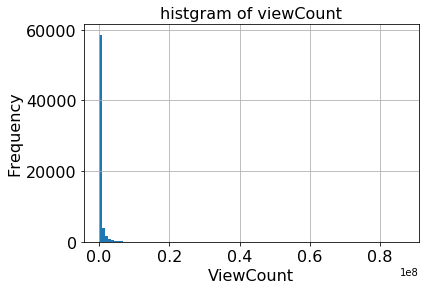

In [6]:
# histgram of viewCount

%matplotlib inline
fontsize = 16

fig, ax = plt.subplots()
df['viewCount'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=fontsize)
ax.set_title('histgram of viewCount', fontsize=fontsize)
ax.set_xlabel('ViewCount', fontsize=fontsize)
ax.set_ylabel('Frequency', fontsize=fontsize)

## <a name="pre1">preprocess method 1: binarization (e.g., by mean value)</a>

In [7]:
# preprocess method 1: binarization by mean value

THRESHOLD = df['viewCount'].mean()
new_column = df['viewCount'] > THRESHOLD
new_column = np.where(new_column == True, 1, 0)
temp = pd.DataFrame(df['viewCount'])
temp['binary'] = new_column
temp.head()

,viewCount,binary
0,2244205.0,1
1,1869268.0,1
2,1724625.0,1
3,1109029.0,1
4,1759797.0,1


## <a name="pre2">preprocess method 2: discretization 1, ad-hoc division</a>

In [8]:
# preprocess method 2: discretization 1, ad-hoc division
floor = 10000
new_column = np.floor_divide(df['viewCount'], floor)
temp['discret_floor'] = new_column
temp.head()

,viewCount,binary,discret_floor
0,2244205.0,1,224.0
1,1869268.0,1,186.0
2,1724625.0,1,172.0
3,1109029.0,1,110.0
4,1759797.0,1,175.0


## <a name="pre3">preprocess method 3: discretization 2, quantilzation</a>

In [9]:
# preprocess method 3: discretization 2, quantilzation
discret_num = 4+1
ranges = np.linspace(0, 1, discret_num)
data = df['viewCount'].quantile(ranges)
data

0.00           2.0
0.25       39191.5
0.50      121585.0
0.75      351519.5
1.00    86642355.0
Name: viewCount, dtype: float64

Text(0, 0.5, 'Freqency')

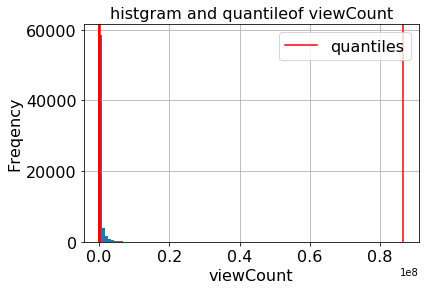

In [10]:
fig, ax = plt.subplots()
df['viewCount'].hist(ax=ax, bins=100)
for position in data:
    handle = plt.axvline(position, color='r')

ax.set_title('histgram and quantileof viewCount', fontsize=fontsize)
ax.legend([handle], ['quantiles'], loc='upper right', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('viewCount', fontsize=fontsize)
ax.set_ylabel('Freqency', fontsize=fontsize)

In [11]:
new_column = pd.qcut(df['viewCount'], discret_num, labels=False)
temp['discret_quantile'] = new_column
temp

,viewCount,binary,discret_floor,discret_quantile
0,2244205.0,1,224.0,4
1,1869268.0,1,186.0,4
2,1724625.0,1,172.0,4
3,1109029.0,1,110.0,4
4,1759797.0,1,175.0,4
5,2389302.0,1,238.0,4
6,1478178.0,1,147.0,4
7,3442245.0,1,344.0,4
8,1070285.0,1,107.0,4
9,1585369.0,1,158.0,4


## <a name="pre4">preprocess method 4: log-scaling</a>

In [12]:
# preprocess method 4: log-scaling
new_column = np.log10(df['viewCount'] + 1)
temp['log10'] = new_column
temp.head()

,viewCount,binary,discret_floor,discret_quantile,log10
0,2244205.0,1,224.0,4,6.351063
1,1869268.0,1,186.0,4,6.271672
2,1724625.0,1,172.0,4,6.236695
3,1109029.0,1,110.0,4,6.044943
4,1759797.0,1,175.0,4,6.245463


## <a name="compare">compare default values with log-scaled values</a>

Text(0, 0.5, 'Freqency')

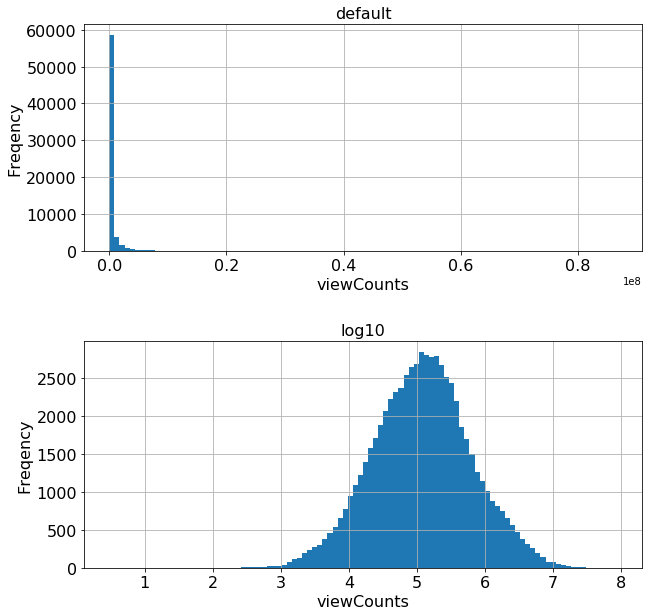

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.4)

# default values
temp['viewCount'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=fontsize)
ax1.set_title('default', fontsize=fontsize)
ax1.set_xlabel('viewCounts', fontsize=fontsize)
ax1.set_ylabel('Freqency', fontsize=fontsize)

# log-scaled
temp['log10'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=fontsize)
ax2.set_title('log10', fontsize=fontsize)
ax2.set_xlabel('viewCounts', fontsize=fontsize)
ax2.set_ylabel('Freqency', fontsize=fontsize)


## <a name="standardization">preprocess method 5: standardization</a>
- [5.3.1. Standardization, or mean removal and variance scaling](https://scikit-learn.org/stable/modules/preprocessing.html)
- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [14]:
from sklearn import preprocessing

data = np.array(df['viewCount'].values, dtype='float64')
data = data.reshape(len(data), 1)
new_column = preprocessing.scale(data)
temp['standardization'] = new_column
temp.head()

,viewCount,binary,discret_floor,discret_quantile,log10,standardization
0,2244205.0,1,224.0,4,6.351063,1.346854
1,1869268.0,1,186.0,4,6.271672,1.064632
2,1724625.0,1,172.0,4,6.236695,0.955757
3,1109029.0,1,110.0,4,6.044943,0.492387
4,1759797.0,1,175.0,4,6.245463,0.982231


In [15]:
mean = np.mean(new_column)
var = np.var(new_column)
print('mean = ', mean, ', var = ', var)

mean =  1.2873900181367037e-17 , var =  1.0


## <a name="minmax">preprocess method 6: Min-Max scalering</a>
- [min-max scaler](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range)

In [16]:
"""
min = data.min(axis=0)
max = data.max(axis=0)
new_column = (data - min) / (max - min)
temp['min-max'] = new_column
temp.head()
"""

new_column = preprocessing.minmax_scale(df['viewCount'])
temp['min-max'] = new_column
temp.head()

,viewCount,binary,discret_floor,discret_quantile,log10,standardization,min-max
0,2244205.0,1,224.0,4,6.351063,1.346854,0.025902
1,1869268.0,1,186.0,4,6.271672,1.064632,0.021575
2,1724625.0,1,172.0,4,6.236695,0.955757,0.019905
3,1109029.0,1,110.0,4,6.044943,0.492387,0.012800
4,1759797.0,1,175.0,4,6.245463,0.982231,0.020311


## <a name="normalization">preprocess method 7: normalization (for feature vector)</a>
- NOTE: the process target is NOT one feature value (one column). **The target of normalization is "feature vector (one row)"**.
- [5.3.3. Normalization](https://scikit-learn.org/stable/modules/preprocessing.html#normalization)

In [17]:
temp.head()

,viewCount,binary,discret_floor,discret_quantile,log10,standardization,min-max
0,2244205.0,1,224.0,4,6.351063,1.346854,0.025902
1,1869268.0,1,186.0,4,6.271672,1.064632,0.021575
2,1724625.0,1,172.0,4,6.236695,0.955757,0.019905
3,1109029.0,1,110.0,4,6.044943,0.492387,0.012800
4,1759797.0,1,175.0,4,6.245463,0.982231,0.020311


In [18]:
normalized_l2 = preprocessing.normalize(temp, norm='l2')
normalized_l2 = pd.DataFrame(normalized_l2, columns=temp.columns)
normalized_l2.head()

,viewCount,binary,discret_floor,discret_quantile,log10,standardization,min-max
0,1.0,4.455921e-07,0.000100,0.000002,0.000003,6.001473e-07,1.154169e-08
1,1.0,5.349688e-07,0.000100,0.000002,0.000003,5.695449e-07,1.154169e-08
2,1.0,5.798362e-07,0.000100,0.000002,0.000004,5.541823e-07,1.154169e-08
3,1.0,9.016897e-07,0.000099,0.000004,0.000005,4.439801e-07,1.154168e-08
4,1.0,5.682474e-07,0.000099,0.000002,0.000004,5.581503e-07,1.154169e-08


In [19]:
sum = 0
for item in normalized_l2.values[0]:
    sum += item ** 2
print('L2 norm = ', sum)

L2 norm =  0.9999999999999994


## <a name="mapping-gaussian">preprocess method 8: Mapping to a Gaussian distribution (for feature vector)</a>
- [Mapping to a Gaussian distribution](https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-gaussian-distribution)

In [20]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
orig = df['viewCount'].values.reshape(-1,1)
new_column = pt.fit_transform(orig)
temp['box-cox'] = new_column
temp.head()

,viewCount,binary,discret_floor,discret_quantile,log10,standardization,min-max,box-cox
0,2244205.0,1,224.0,4,6.351063,1.346854,0.025902,15.286494
1,1869268.0,1,186.0,4,6.271672,1.064632,0.021575,15.086987
2,1724625.0,1,172.0,4,6.236695,0.955757,0.019905,14.999160
3,1109029.0,1,110.0,4,6.044943,0.492387,0.012800,14.518429
4,1759797.0,1,175.0,4,6.245463,0.982231,0.020311,15.021172


## <a name="compare-box-cox">compare default values with box-cox values</a>

Text(0, 0.5, 'Freqency')

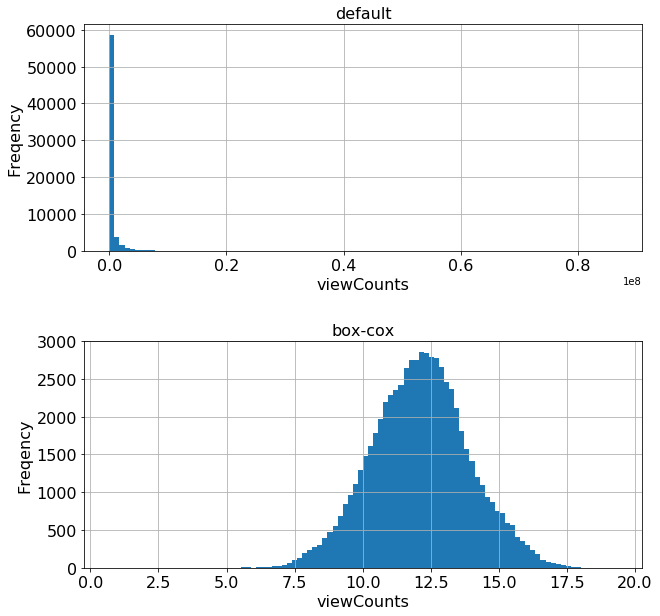

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.4)

# default values
temp['viewCount'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=fontsize)
ax1.set_title('default', fontsize=fontsize)
ax1.set_xlabel('viewCounts', fontsize=fontsize)
ax1.set_ylabel('Freqency', fontsize=fontsize)

# box-cox
temp['box-cox'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=fontsize)
ax2.set_title('box-cox', fontsize=fontsize)
ax2.set_xlabel('viewCounts', fontsize=fontsize)
ax2.set_ylabel('Freqency', fontsize=fontsize)